In [84]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouseclinicaldata_df = pd.merge(mouse_data_df, clinical_data_df, how='outer', on='Mouse ID')


# Display the data table for preview
mouseclinicaldata_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [144]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
meantumorvolume_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).mean()
                                       ['Tumor Volume (mm3)'])

# Preview DataFrame
meantumorvolume_grouped.head(2)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086

In [143]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint and convert to dataframe
semtumorvolume_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).sem()
                                       ['Tumor Volume (mm3)'])

# Preview DataFrame
semtumorvolume_grouped.head(2)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593

In [142]:
# Minor Data Munging to Re-Format the Data Frames

#turning the drug column into separate columns
meantumorvolume_grouped_reformat = meantumorvolume_grouped.unstack('Drug')
#removing "Tumor Volume (mm3) as top level for cleaner more workable layout
meantumorvolume_grouped_reformat.columns = meantumorvolume_grouped_reformat.columns.droplevel()
#make Timepoint a column so that I can work with it in a plot
final_mean_tvolume = meantumorvolume_grouped_reformat.reset_index(level='Timepoint')

##preview to confirm data frame is reformatted
final_mean_tvolume.head(2)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818


In [141]:
#Dropping the 'Tumor Volume (mm3)' to have drugs as columns and timepoints as index
#this step will give the Standard Error df the same layout as the Mean df

semtumorvolume_grouped_reformat = semtumorvolume_grouped.unstack('Drug')
semtumorvolume_grouped_reformat.columns = semtumorvolume_grouped_reformat.columns.droplevel()
final_sem_tvolume = semtumorvolume_grouped_reformat.reset_index(level='Timepoint')

##preview to confirm data frame is reformatted
final_sem_tvolume.head(2)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.18895


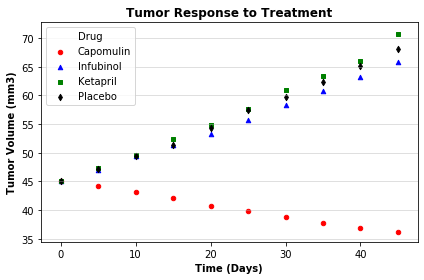

<Figure size 432x288 with 0 Axes>

In [135]:
# Generate the Plot (with Error Bars)

ax = final_mean_tvolume.plot(kind='scatter', x='Timepoint', y=['Capomulin'], color='red', label='Capomulin', marker='o')
final_mean_tvolume.plot(kind='scatter', x='Timepoint', y=['Infubinol'], color='blue', label='Infubinol', marker='^',  ax=ax)
final_mean_tvolume.plot(kind='scatter', x='Timepoint', y=['Ketapril'], color='green', label='Ketapril', marker='s', ax=ax)
final_mean_tvolume.plot(kind='scatter', x='Timepoint', y=['Placebo'], color='black', label='Placebo', marker='d', ax=ax)

##NEED TO ADD ERROR BARS

plt.title("Tumor Response to Treatment", fontweight='bold')
plt.xlabel("Time (Days)", fontweight='bold')
plt.ylabel("Tumor Volume (mm3)", fontweight='bold')

plt.axes()        
ax.yaxis.grid(linestyle='-', alpha=0.5)
##NEED TO ADD MARKER PATH TO CONNECT POINTS IN A GROUP TOGETHER

plt.tight_layout()
plt.show()

# Save the Figure
plt.savefig("../Images/mean_tumor_volume.png")


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [145]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint and converted to a dataframe
mean_metsite_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).mean()
                                       ['Metastatic Sites'])

# Preview DataFrame
mean_metsite_grouped.head(2)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                      0.00
          5                      0.16

In [146]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metsite_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).sem()
                                       ['Metastatic Sites'])

# Preview DataFrame
sem_metsite_grouped.head(2)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833

In [147]:
# Minor Data Munging to Re-Format the Data Frames

#turning the drug column into separate column
mean_metsite_grouped_reformat = mean_metsite_grouped.unstack('Drug')
#removing 'Metastatic Sites' as top level for clearner more workable layout
mean_metsite_grouped_reformat.columns = mean_metsite_grouped_reformat.columns.droplevel()
#make Timepoint a column so that I can work with it in a plot
final_mean_metsite = mean_metsite_grouped_reformat.reset_index(level='Timepoint')

# Preview that Reformatting worked
final_mean_metsite.head(2)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
1,5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


In [148]:
#reformating 'standard error of metastatic sites' dataframe

#turning the drug column into separate column
sem_metsite_grouped_reformat = sem_metsite_grouped.unstack('Drug')
#removing 'Metastatic Sites' as top level for clearner more workable layout
sem_metsite_grouped_reformat.columns = sem_metsite_grouped_reformat.columns.droplevel()
#make Timepoint a column so that I can work with it in a plot
final_sem_metsite = sem_metsite_grouped_reformat.reset_index(level='Timepoint')

# Preview that Reformatting worked
final_sem_metsite.head(2)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.0981,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709


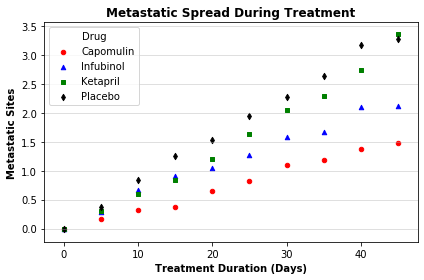

In [127]:
# Generate the Plot (with Error Bars)

ax = final_mean_metsite.plot(kind='scatter', x='Timepoint', y=['Capomulin'], color='red', label='Capomulin', marker='o')
final_mean_metsite.plot(kind='scatter', x='Timepoint', y=['Infubinol'], color='blue', label='Infubinol', marker='^',  ax=ax)
final_mean_metsite.plot(kind='scatter', x='Timepoint', y=['Ketapril'], color='green', label='Ketapril', marker='s', ax=ax)
final_mean_metsite.plot(kind='scatter', x='Timepoint', y=['Placebo'], color='black', label='Placebo', marker='d', ax=ax)

##NEED TO ADD ERROR BARS

plt.title("Metastatic Spread During Treatment", fontweight='bold')
plt.xlabel("Treatment Duration (Days)", fontweight='bold')
plt.ylabel("Metastatic Sites", fontweight='bold')

plt.axes()        
ax.yaxis.grid(linestyle='-', alpha=0.5)
##NEED TO ADD MARKER PATH TO CONNECT POINTS IN A GROUP TOGETHER

plt.tight_layout()

# Save the Figure
plt.savefig("../Images/mean_metsite.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)